In [86]:
#Loading Relevant Modules
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

In [88]:
#Load Data
dataset = fetch_california_housing()

In [89]:
#Understanding the Data (Attributes)
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [90]:
#Defining X, Y
X = dataset['data']
Y = dataset['target']
feature_names = dataset['feature_names']

In [91]:
#Bringing all Features on uniform scale uing StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [92]:
# Train and Test Data Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=42)

In [93]:
# Multi-linear Regression (with all 8 predictive attributes)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [94]:
r2_s = r2_score(y_test, y_pred)
meanSquared_error = mean_squared_error(y_test, y_pred)
print("R2_Score, meanSquared Error  With all Predictive Attributes (No Feature Selection Applied) ===> ",r2_s , meanSquared_error)

R2_Score, meanSquared Error  With all Predictive Attributes (No Feature Selection Applied) ===>  0.5757877060324511 0.555891598695244


# ***Filter Based Feature Selection Methods***





## ***Mutual Information Regression***

### ***Using SelectKbest***

In [95]:
#Load mutual_info_regression Libraries
from sklearn.feature_selection import mutual_info_regression,SelectKBest

In [96]:
#Using SelectKBest
X_mir = SelectKBest(mutual_info_regression, k=4).fit_transform(X, Y)
print(X_mir.shape)

(20640, 4)


In [98]:
# Train and Test Data Split
x_train, x_test, y_train, y_test = train_test_split(X_mir, Y, test_size=0.2,random_state=42)

In [99]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score_mir=r2_score(y_test, y_pred)
meanSquared_error = mean_squared_error(y_test, y_pred)
print("R2_Score, meanSquared Error,  With SelectKBest - Mutual_info_Regression Applied ===> ",r2_score_mir,meanSquared_error)

R2_Score, meanSquared Error,  With SelectKBest - Mutual_info_Regression Applied ===>  0.5723585255218364 0.560385227624362


### ***Using SelectPercentile***

In [100]:
#import SelectPercentile
from sklearn.feature_selection import SelectPercentile

In [101]:
# Using SelectPercentile
X_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(X, Y)
print(X_new.shape)

(20640, 4)


In [102]:
# Train and Test Data Split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2,random_state=42)

In [103]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score_mir=r2_score(y_test, y_pred)
meanSquared_error = mean_squared_error(y_test, y_pred)
print("R2_Score, meanSquared_error With SelectPercentile - Mutual_info_Regression Applied ===> ",r2_score_mir,meanSquared_error)

R2_Score, meanSquared_error With SelectPercentile - Mutual_info_Regression Applied ===>  0.5723585255218364 0.560385227624362


# ***f_Regression***

In [104]:
#Import f_regression module from sklearn
from sklearn.feature_selection import f_regression

In [105]:
#Using SelectKBest with f_regression
X_fReg = SelectKBest(f_regression, k=6).fit_transform(X, Y)

In [106]:
# Train and Test Data Split
x_train, x_test, y_train, y_test = train_test_split(X_fReg, Y, test_size=0.2,random_state=42)

In [107]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score_mir=r2_score(y_test, y_pred)
meanSquared_error = mean_squared_error(y_test, y_pred)
print("R2_Score, MeanSquared_Error With f_Regression Applied ===> ",r2_score_mir,meanSquared_error)

R2_Score, MeanSquared_Error With f_Regression Applied ===>  0.5749693819995385 0.5569639378550829


# ***Analyze relationship Among the features themselves ***

In [114]:
#import pandas
import pandas as pd
#Convert X into Dataframe
X_df = pd.DataFrame(X, columns=feature_names)
X_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [115]:
#Correlation
X_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

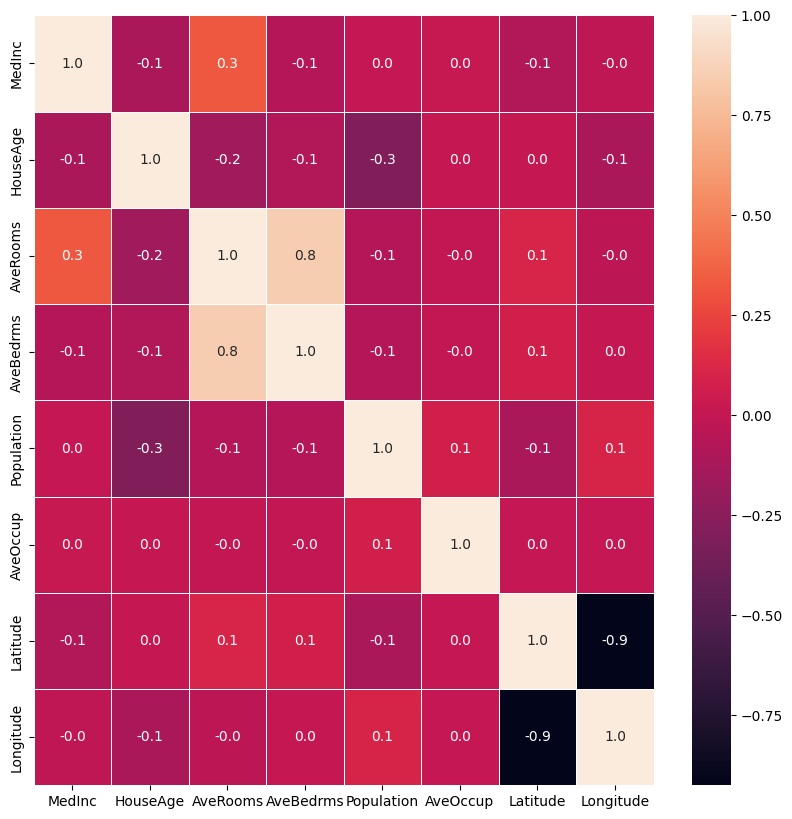

In [116]:
#import seaborn
import seaborn as sns
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

*From the above heat map it is clear that Latitude and AveRooms have strong correlation with other features*

In [117]:
X_df = X_df.drop(['AveRooms', 'Longitude'], axis=1)
X_df.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude
0,2.344766,0.982143,-0.153758,-0.974429,-0.049597,1.052548
1,2.332238,-0.607019,-0.263336,0.861439,-0.092512,1.043185
2,1.782699,1.856182,-0.049016,-0.820777,-0.025843,1.038503
3,0.932968,1.856182,-0.049833,-0.766028,-0.050329,1.038503
4,-0.012881,1.856182,-0.032906,-0.759847,-0.085616,1.038503


In [118]:
#train and test Split
x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size=0.2,random_state=42)
#Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2_Score,meanSquared_error With Anaysis of relationship between Features themselves Applied ===> ",r2_score(y_test, y_pred),  mean_squared_error(y_test, y_pred)
)

R2_Score,meanSquared_error With Anaysis of relationship between Features themselves Applied ===>  0.5032184434254283 0.650987011959808


# ***Wrapper Based Methods for Feature Selection***

# ***Recursive Feature Elimination (RFE)***

In [119]:
#import RFE and Lasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

# Regression
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=3, step=1).fit(X, Y)
print(selector.ranking_, )

[6 5 4 3 2 1 1 1]


In [120]:
X_rfe = selector.transform(X)
print(X_rfe.shape)

(20640, 3)


In [121]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X_rfe, Y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2_Score and meanSquared_error  With Recursive Feature Elimination Applied ===> ",r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred))

R2_Score and meanSquared_error  With Recursive Feature Elimination Applied ===>  0.25357043657990896 0.9781280015301222


# ***Sequential Feature Selection***

In [122]:
#Load Sequential Feature selection module
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

In [123]:
#Initialize CV
ridge = RidgeCV().fit(X, Y)
#Sequential Feature Selection
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(X, Y)

print(sfs_forward)

SequentialFeatureSelector(estimator=RidgeCV(), n_features_to_select='auto')


In [124]:
X_new = sfs_forward.transform(X)
X_new.shape

(20640, 4)

In [125]:
#train test Split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2,random_state=42)
#Using Linear regressor
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2_Score and meanSquared Error With Sequential Feature Selection Applied ===> ",r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred))

R2_Score and meanSquared Error With Sequential Feature Selection Applied ===>  0.5088800081000431 0.6435680467793014


# ***Embedded Methods ( L1 Regularization)***

In [126]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [127]:
#Lasso Regression
w = []
r2_scores = []
mse_list= []
alpha_list = [0,0.001,0.01,0.1, 0.5, 2]

for alpha in alpha_list:
    # fit model
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)

    # prediction
    y_pred = model.predict(x_test)

    # store metrics for prediction, for each fit
    r2_scores.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    w.append(model.coef_.tolist())

<ipython-input-127-9ccffa392210>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.276e+03, tolerance: 2.207e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


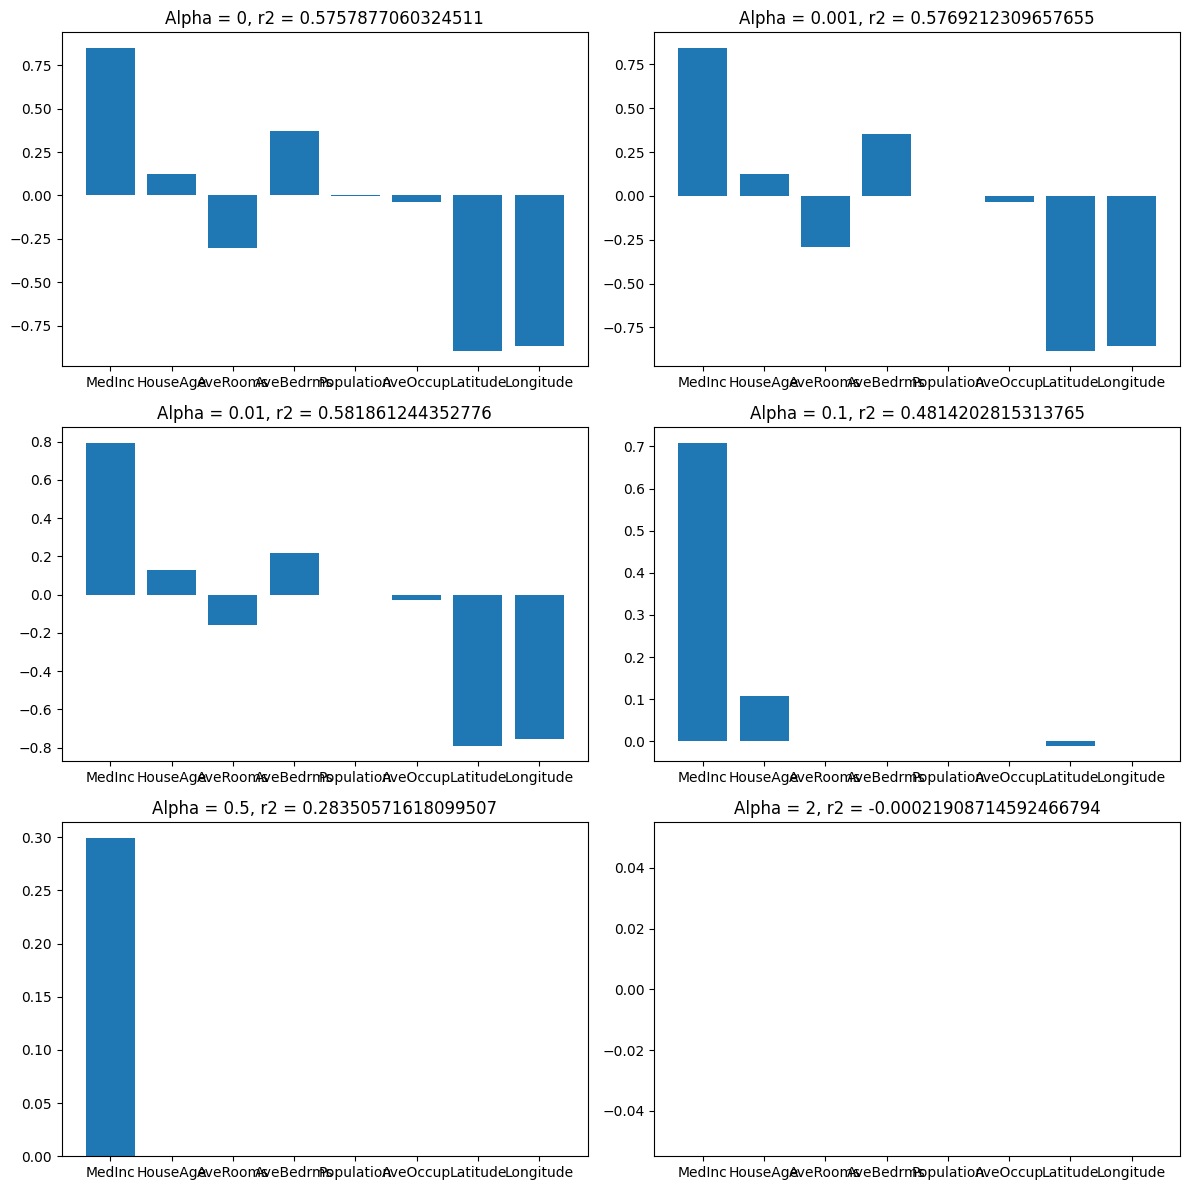

In [128]:
# Visualise Feature Selection

fig=plt.figure(figsize=(12, 12))

for i in range(len(alpha_list)):
  plt.subplot(3, 2, i+1)
  plt.bar(feature_names, w[i])
  plt.title('Alpha = {}, r2 = {}'.format(alpha_list[i], r2_scores[i]))
  plt.tight_layout()

plt.show()



In [129]:
print('Lasso Ignoring Population feature and its respective Coefficients are ',w[2])
print('Lasso Ignoring Average Rooms, Average Bed Rooms,Population, AveOccup  features and its respective Coefficients are ',w[3])
print(mse_list)

Lasso Ignoring Population feature and its respective Coefficients are  [0.7953041246596954, 0.12700165243907238, -0.1593924018596946, 0.21628228173043212, -0.0, -0.02829497457383147, -0.7922300030270428, -0.7567371527159851]
Lasso Ignoring Average Rooms, Average Bed Rooms,Population, AveOccup  features and its respective Coefficients are  [0.7091858667658841, 0.10647473451647604, -0.0, 0.0, -0.0, -0.0, -0.011479042198151528, -0.0]
[0.555891598695244, 0.5544062174455687, 0.5479327795506, 0.6795515190149223, 0.9389005423747073, 1.3106960720039365]


# ***Dimensionality Reduction Technique (PCA)***

In [130]:
#Import PCA module
from sklearn.decomposition import PCA

#Initialize and run PCA
X_new = PCA(n_components=4, svd_solver='full').fit_transform(X)
print(X_new.shape)

(20640, 4)


In [131]:
#train test data split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)

#Regressor Model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2_Score and meanSquared error With PCA Applied ===> ",r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred))

R2_Score and meanSquared error With PCA Applied ===>  0.43952926021979644 0.7339006009352198
